<a href="https://colab.research.google.com/github/gioguarnieri/Materias_Doutorado_INPE/blob/main/Estat%C3%ADstica_Computacional/Exerc%C3%ADcio_3_Giovanni_Guarnieri_Soares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3 from Computational Statistics Class
Name: Giovanni Guarnieri Soares

Lecturer: Valdivino Alexandre de Santiago Júnior

In [ ]:
# capture is a magic command to capture the output
%%capture
!pip install -U kaleido # needed to the images
!pip install plotly>=4.0.0
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca # needed to save the images
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

In [ ]:
import pandas as pd
import numpy as np
import plotly.io as pio
import plotly.express as px # plotting module
import plotly.graph_objects as go # plotting module
import plotly.io as pio
from scipy.stats import norm


pio.renderers.default = "png" # setting png as default so images appear in github

In [ ]:
def plot_distribution(data,
                      title = None, 
                      density = None, 
                      extra = None, 
                      extra_name = None, 
                      extra2 = None, 
                      extra2_name = None): # histogram plotting function
  counts, bins = np.histogram(data, 
                              bins=100, 
                              range=(min(data),max(data)), 
                              density = density) # making the bins
  unity = counts/np.sum(counts)
  bins = 0.5 * (bins[:-1] + bins[1:]) # making the bins stay in the middle
  fig = px.bar(x=bins, 
               y=unity, 
               labels={'x':'Precipitation', 'y':'count'}, 
               title = title,
               width=1200, height=600) # plotting
  if extra != None:
    fig.add_trace(go.Scatter(x=[extra,extra], 
                         y=[0,max(counts)], 
                         mode='lines', 
                         line=dict(color='firebrick', width=2, dash='dash'),
                         name=extra_name))
  if extra2 != None:
    fig.add_trace(go.Scatter(x=[extra+extra2,extra+extra2], 
                         y=[0,max(counts)], 
                         mode='lines', 
                         line=dict(color='green', width=2, dash='dash'),
                         name=extra2_name))
    fig.add_trace(go.Scatter(x=[extra-extra2,extra-extra2], 
                         y=[0,max(counts)], 
                         mode='lines', 
                         line=dict(color='green', width=2, dash='dash'),
                         name=extra2_name,
                         showlegend=False))


  fig.update_layout(
      font=dict(
          family="Courier New, monospace",
          size=22,
          color="Black"
      )
  )
  return fig, unity

# Exercise 3 (Practical)

On a given farm, profits depend on rain. Consider the dataset shown [here](https://github.com/vsantjr/CAP/tree/master/CAP417/Precipitation) that provides the precipitation (in mm) in one year in the location of the farm. Moreover, consider that the expected profit of the farm is in accordance with the following conditions:

*   If the precipitation is over 47 mm, the profit is R$ 50,000.00;

*   If the precipitation is between 30 and 47 mm, the profit is R$ 100,000.00;

*   If the precipitation is between 20 and 30 mm, the profit is R$ 80,000.00;

*   If the precipitation is between 10 and 20 mm, the profit is R$ 35,000.00;

*   If the precipitation is between 5 and 10 mm, the profit is R$ -30,000.00;

*   If the precipitation is less than 5 mm, the profit is R$ -50,000.00.

Develop a program to solve the questions below:

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/vsantjr/CAP/master/CAP417/Precipitation/precipitation.csv")
df

,Day,Precipitation
0,1,50.13
1,2,34.63
2,3,35.59
3,4,18.74
4,5,46.62
...,...,...
360,361,30.72
361,362,32.93
362,363,33.97
363,364,20.11


## 1. Show that this dataset is normally distributed.

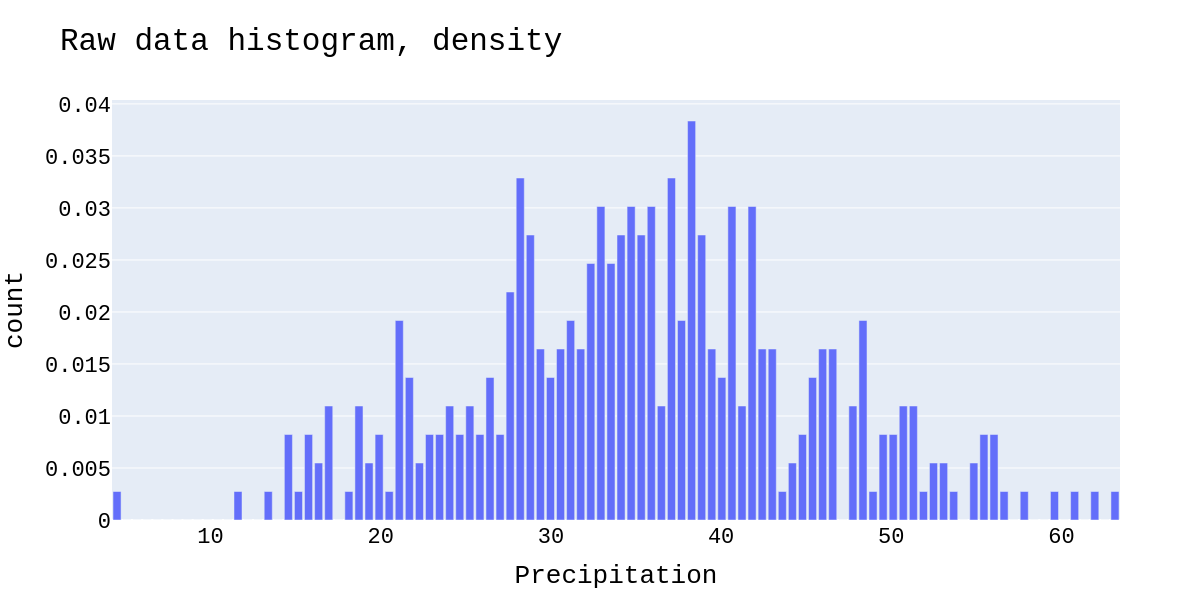

In [ ]:
fig,_ = plot_distribution(df['Precipitation'], title = "Raw data histogram, density")
fig.show()

the distribution is clearly normal

## 2. Plot the raw data and... 

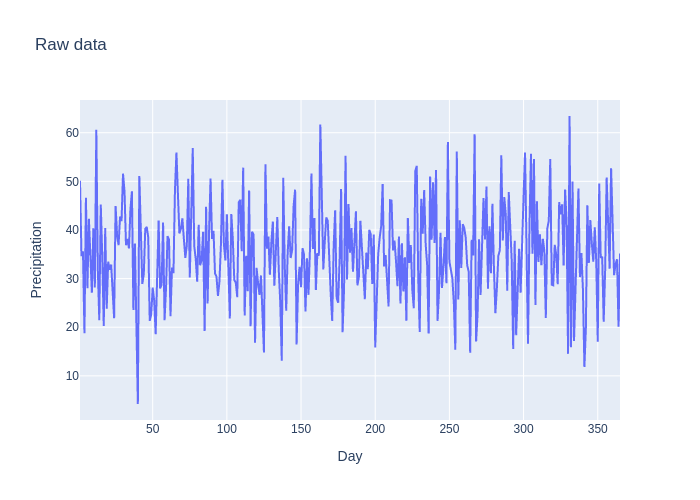

In [ ]:
px.line(df, "Day", "Precipitation", title = "Raw data")

the raw data as a time series

### also the pdf of this dataset.

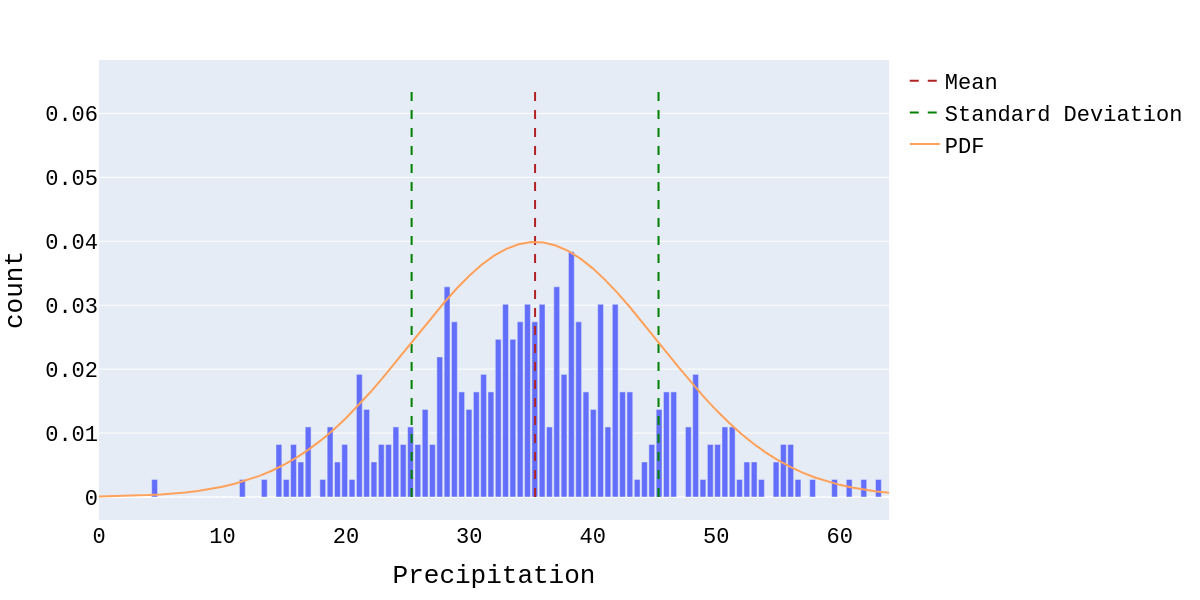

In [ ]:
# print(f"Dataset mean: {df['Precipitation'].mean()} and Standard Deviation: {df['Precipitation'].std()}")
fig, counts = plot_distribution(df['Precipitation'], 
                        density=True, 
                        extra = df['Precipitation'].mean(), 
                        extra_name = "Mean",
                        extra2 = df['Precipitation'].std(), 
                        extra2_name = "Standard Deviation")
x = np.arange(0,65)
prob_func = norm.pdf(x,df['Precipitation'].mean(),df['Precipitation'].std())
fig.add_trace(go.Scatter(x=x, y=prob_func, name="PDF"))
fig.show()

and the histogram plotted with the PDF, mean and standard deviation.

## 3. Does the above pdf actually satisfy property 3 (see at the beginning) that a function must have in order to be really considered a pdf?

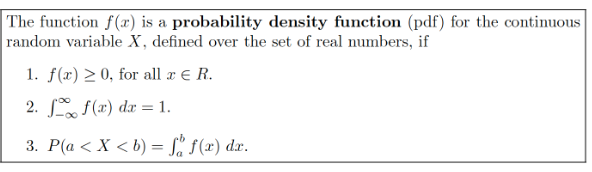

given the property 3, and 2, calculating the probability of both the data and the PDF, we have the sum as:

In [ ]:
print(f"Sum of the PDF: {np.sum(prob_func)}, sum of the density of data: {np.sum(counts)}")

Sum of the PDF: 0.9980702539098999, sum of the density of data: 0.9999999999999998


which is close enough when comparing both.



## 4. What is the expected profit of this farm?

Here we categorize the data in each interval, and then sum everything to calculate the expected profit

In [ ]:
preci = df["Precipitation"]
cond_list = [preci < 5, preci <= 10, preci <= 20, preci <= 30, preci <= 47, preci >= 47]
choice_list = [-50000, -30000, 35000, 80000, 100000, 50000]
df["Profit"] = np.select(cond_list, choice_list)
df

,Day,Precipitation,Profit
0,1,50.13,50000
1,2,34.63,100000
2,3,35.59,100000
3,4,18.74,35000
4,5,46.62,100000
...,...,...,...
360,361,30.72,100000
361,362,32.93,100000
362,363,33.97,100000
363,364,20.11,80000


In [ ]:
print(f"Expected profit: {df['Profit'].sum()}")

Expected profit: 30875000
